# Gradient Descent Implementation using a custom class

We will create a custom class that implements gradient descent to a fabricated dataset. We will only use one input feature for this case.

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [9]:
X,y = make_regression(n_features=1,noise=20)

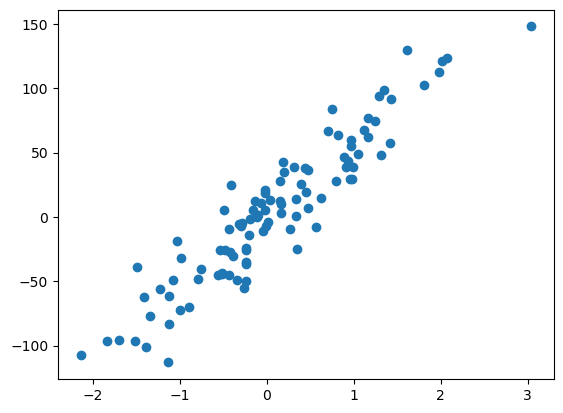

In [10]:
plt.scatter(X, y)

## Using OLS to find the actual data for Cross checking

In [72]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y)

m = reg.coef_
bb = reg.intercept_
print(f"Coefficient is {m} and the intercept is {b}")

y_pred = reg.predict(X)

Coefficient is [55.42840082] and the intercept is 0.07438509470930832


## Taking 'm' and working on 'b'

In [65]:
class GDReg:

    def __init__(self, learning_rate = 0.001, epochs = 100):
        self.m = m
        self.b = -200 # a random value, extreme to check the robustness of GD
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        # calculating the new b using the loss slope function
        for i in range(self.epochs):
            loss_slope = -2 * np.sum(y - self.m*X.ravel() - self.b)
            self.b = self.b - ( self.lr*loss_slope )

    def predict(self,X_test):
        y_pred = ((m*X) + slef.b).reshape(100)

See how we need to make a balance of both the number of Epochs and the Learning Rate:

In [70]:
gd1 = GDReg(0.1,10)
gd1.fit(X,y)
print(f"For LR: {0.1} and Epochs: {10}, Slope is: {(gd1.b):.2f} and diff is : {(bb - gd1.b):.2f}")

gd2= GDReg(0.1,100)
gd2.fit(X,y)
print(f"For LR {0.1} and Epochs: {100}, Slope is: {gd2.b:.2f} and diff is : {(bb - gd2.b):.2f}")

gd3= GDReg(0.1,1000)
gd3.fit(X,y)
print(f"For LR {0.1} and Epochs: {1000}, Slope is: {gd3.b:.2f} and diff is : {(bb - gd3.b):.2f}")

gd4= GDReg(0.01,100)
gd4.fit(X,y)
print(f"For LR {0.01} and Epochs: {100}, Slope is: {gd4.b:.2f} and diff is : {(bb - gd4.b):.2f}")

gd5= GDReg(0.001,100)
gd5.fit(X,y)
print(f"For LR {0.001} and Epochs: {100}, Slope is: {gd5.b} and diff is : {(bb - gd5.b)}")

For LR: 0.1 and Epochs: 10, Slope is: -1226669311504455.75 and diff is : 1226669311504455.75
For LR 0.1 and Epochs: 100, Slope is: -15015907561824557759302001876781476269903773273562731628367499209644199239134717885980714276956585861053043105574541340207910748160.00 and diff is : 15015907561824557759302001876781476269903773273562731628367499209644199239134717885980714276956585861053043105574541340207910748160.00
For LR 0.1 and Epochs: 1000, Slope is: nan and diff is : nan
For LR 0.01 and Epochs: 100, Slope is: -200.00 and diff is : 200.07
For LR 0.001 and Epochs: 100, Slope is: 0.07438505395343634 and diff is : 4.075587198282271e-08


/var/folders/nm/r0qdzw9d3rv2qzx2_t5v99th0000gn/T/ipykernel_15363/1883993802.py:13: RuntimeWarning: invalid value encountered in scalar subtract
  self.b = self.b - ( self.lr*loss_slope )


As we can see, learning rate is a must watch, we should keep it small. The b for Lr = 0.1 and epochs=1000, is out of bound

Now we have the loss function as sum of two variables. And we need to find the b and m where the 3D structure reaches its minima.

Then we can initialize some random values for 'b' and 'm', and work on improving them both.